<a href="https://colab.research.google.com/github/suhani1209/Geeksman_AISquad_Project1_SUHANI-MITTAL-/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **In this notebook, prediction part of the project is covered.**



***Firstly, we will start by setting up kaggle***

***Step 1***

Upload kaggle.json file

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


***Step 2***

Setting up environment variables so that kaggle api can work properly.

In [ ]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

***Step 3***

Downloading the required dataset, since we require it for prediction.


In [ ]:
!kaggle datasets download -d suhanimittal12/mobile-gallery-image-classification

100% 456M/456M [00:03<00:00, 125MB/s]
100% 456M/456M [00:03<00:00, 125MB/s]


***Step 4***

Unzip downloaded data

In [ ]:
!unzip "*.zip"

Archive:  mobile-gallery-image-classification.zip
  inflating: test/cars_008.jpg       
  inflating: test/cars_011.jpg       
  inflating: test/cars_024.jpg       
  inflating: test/cars_027.jpg       
  inflating: test/cars_035.jpg       
  inflating: test/cars_056.jpg       
  inflating: test/cars_076.jpg       
  inflating: test/cars_081.jpg       
  inflating: test/cars_082.jpg       
  inflating: test/cars_083.jpg       
  inflating: test/cars_086.jpg       
  inflating: test/cars_092.jpg       
  inflating: test/cars_099.jpg       
  inflating: test/cars_105.jpg       
  inflating: test/cars_119.jpg       
  inflating: test/cars_137.jpg       
  inflating: test/cars_139.jpg       
  inflating: test/cars_141.jpg       
  inflating: test/cars_149.jpg       
  inflating: test/cars_162.jpg       
  inflating: test/dwight.jpg         
  inflating: test/house.jpg          
  inflating: test/mahabodhi_tree.jpg  
  inflating: test/maruti800.jpg      
  inflating: test/memes_001.jpg      

***Mounting Google Drive to access the previously saved results..***

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


***And here the concept of prediction starts ***

***Two things are required to get our model to make predictions for us.***

1. fastai library import
2. Our saved model


Just importing required **libraries**

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

***Saving our directory path to a variable so that we don"t have to write so long everytime to refer to the directory***

In [ ]:
my_dir="/content/drive/My Drive/dl_projects/mobile_gallery_img_classification"

In [ ]:
predictor = load_learner(my_dir)

**Making prediction function which accepts a test_image address as input and will return result for us.**

In [ ]:
def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class

***Predicting for a single image***

In [ ]:
all_test_images=os.listdir("test")

Selfies


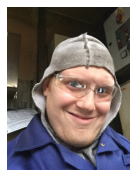

In [ ]:
idx=0
print(my_predictor("test/"+all_test_images[idx]))
img = open_image("test/"+all_test_images[idx])
img.show()

## **Making** **Video** 

In [ ]:
import cv2
test_files=os.listdir("test")
os.makedirs("test_result",exist_ok=True)
i=0
for test_file in test_files:
  img=cv2.imread("test/"+test_file)
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  font = cv2.FONT_HERSHEY_SIMPLEX 
  i+=1
  org = (0, 50) 
  fontScale = 2
  color = (255, 0, 0) 
  thickness = 4
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("test_result/"+str(i)+".jpg", img)

In [ ]:
%cd "test_result"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' \-c:v libx264 -r 1 -pix_fmt yuv420p ../final_output_video.mp4
%cd ..

/content/test_result
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable

In [ ]:
!pip install -U kora
from kora.drive import upload_public


In [ ]:
url = upload_public('final_output_video.mp4')

In [ ]:

from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")

In [ ]:
url

'https://drive.google.com/uc?id=1tDM45TC1qbWYBHoi5Ou7WAjis8OJLVYH'